Import Libraries

In [1]:
import pandas as pd
from pandas import unique
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Files

In [3]:
# Define the correct folder path
base_path = "/content/drive/MyDrive/Capstone Project/Data/"

# Load data
data = pd.read_csv(base_path + "Hospital_Inpatient_Discharges.csv")

<ipython-input-3-9877a4c55abe>:5: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(base_path + "Hospital_Inpatient_Discharges.csv")


EDA

In [4]:
# Check data types
df_dtypes = pd.DataFrame({"Feature": data.columns, "Type": data.dtypes.astype(str)})
print(tabulate(df_dtypes, headers="keys", showindex=False, tablefmt="rounded_outline"))

╭─────────────────────────────────────┬─────────╮
│ Feature                             │ Type    │
├─────────────────────────────────────┼─────────┤
│ Hospital Service Area               │ object  │
│ Hospital County                     │ object  │
│ Operating Certificate Number        │ float64 │
│ Permanent Facility Id               │ float64 │
│ Facility Name                       │ object  │
│ Age Group                           │ object  │
│ Zip Code - 3 digits                 │ object  │
│ Gender                              │ object  │
│ Race                                │ object  │
│ Ethnicity                           │ object  │
│ Length of Stay                      │ object  │
│ Type of Admission                   │ object  │
│ Patient Disposition                 │ object  │
│ Discharge Year                      │ int64   │
│ CCS Diagnosis Code                  │ int64   │
│ CCS Diagnosis Description           │ object  │
│ CCS Procedure Code                  │ int64   │


In [5]:
# Check the size of the dataframe
df_size = data.shape
print(tabulate([["Rows", df_size[0]], ["Features", df_size[1]]], tablefmt="rounded_outline"))

╭──────────┬─────────╮
│ Rows     │ 2343569 │
│ Features │      34 │
╰──────────┴─────────╯


In [6]:
# Check for initial missing values per column
initial_missing_values = data.isnull().sum().reset_index()
print("Missing Values per Feature Before Preprocessing")
print(tabulate(initial_missing_values, headers=["Feature", "Quantity"], showindex=False, tablefmt="rounded_outline"))

Missing Values per Feature Before Preprocessing
╭─────────────────────────────────────┬────────────╮
│ Feature                             │   Quantity │
├─────────────────────────────────────┼────────────┤
│ Hospital Service Area               │       5155 │
│ Hospital County                     │       5155 │
│ Operating Certificate Number        │       5155 │
│ Permanent Facility Id               │       5155 │
│ Facility Name                       │          0 │
│ Age Group                           │          0 │
│ Zip Code - 3 digits                 │      39019 │
│ Gender                              │          0 │
│ Race                                │          0 │
│ Ethnicity                           │          0 │
│ Length of Stay                      │          0 │
│ Type of Admission                   │          0 │
│ Patient Disposition                 │          0 │
│ Discharge Year                      │          0 │
│ CCS Diagnosis Code                  │          0 

In [7]:
# Check for initial unique values
initial_unique_values = data.nunique().reset_index()
print("Unique Values per Feature Before Preprocessing")
print(tabulate(initial_unique_values, headers=["Feature", "Quantity"], showindex=False, tablefmt="rounded_outline"))

Unique Values per Feature Before Preprocessing
╭─────────────────────────────────────┬────────────╮
│ Feature                             │   Quantity │
├─────────────────────────────────────┼────────────┤
│ Hospital Service Area               │          8 │
│ Hospital County                     │         57 │
│ Operating Certificate Number        │        174 │
│ Permanent Facility Id               │        211 │
│ Facility Name                       │        211 │
│ Age Group                           │          5 │
│ Zip Code - 3 digits                 │         50 │
│ Gender                              │          3 │
│ Race                                │          4 │
│ Ethnicity                           │          4 │
│ Length of Stay                      │        120 │
│ Type of Admission                   │          6 │
│ Patient Disposition                 │         20 │
│ Discharge Year                      │          1 │
│ CCS Diagnosis Code                  │        263 │

Plots

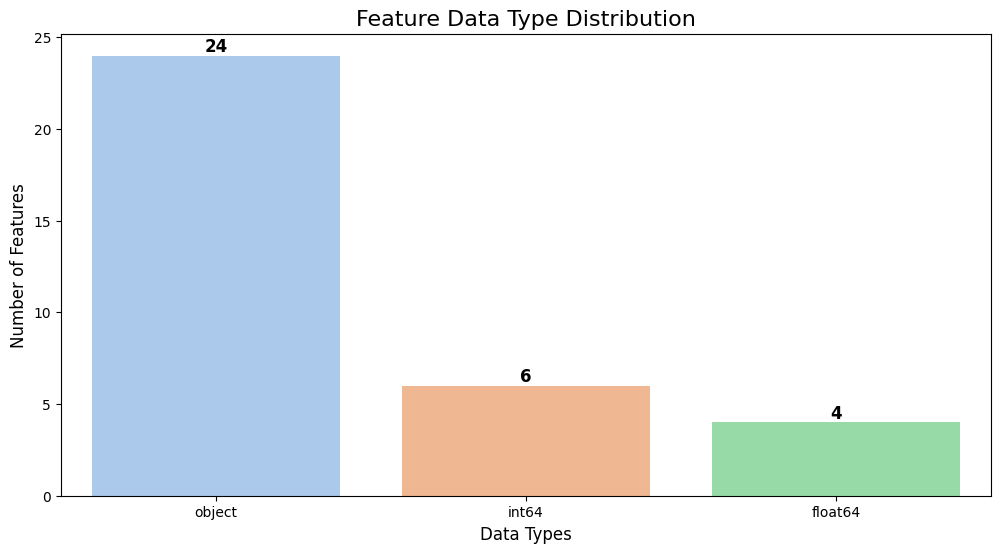

In [8]:
# Data type distribution
fig1, ax1 = plt.subplots(figsize=(12,6))
data_types = data.dtypes.value_counts()
sns.barplot(x=data_types.index.astype(str), y=data_types.values, ax=ax1, hue=data_types.index.astype(str), palette="pastel", legend=False)
for bar in ax1.patches:
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height()+0.5,
             str(int(bar.get_height())), ha="center", va="center",
             fontsize=12, fontweight="bold")
ax1.set_title("Feature Data Type Distribution", fontsize=16)
ax1.set_xlabel("Data Types", fontsize=12)
ax1.set_ylabel("Number of Features", fontsize=12)
plt.show()

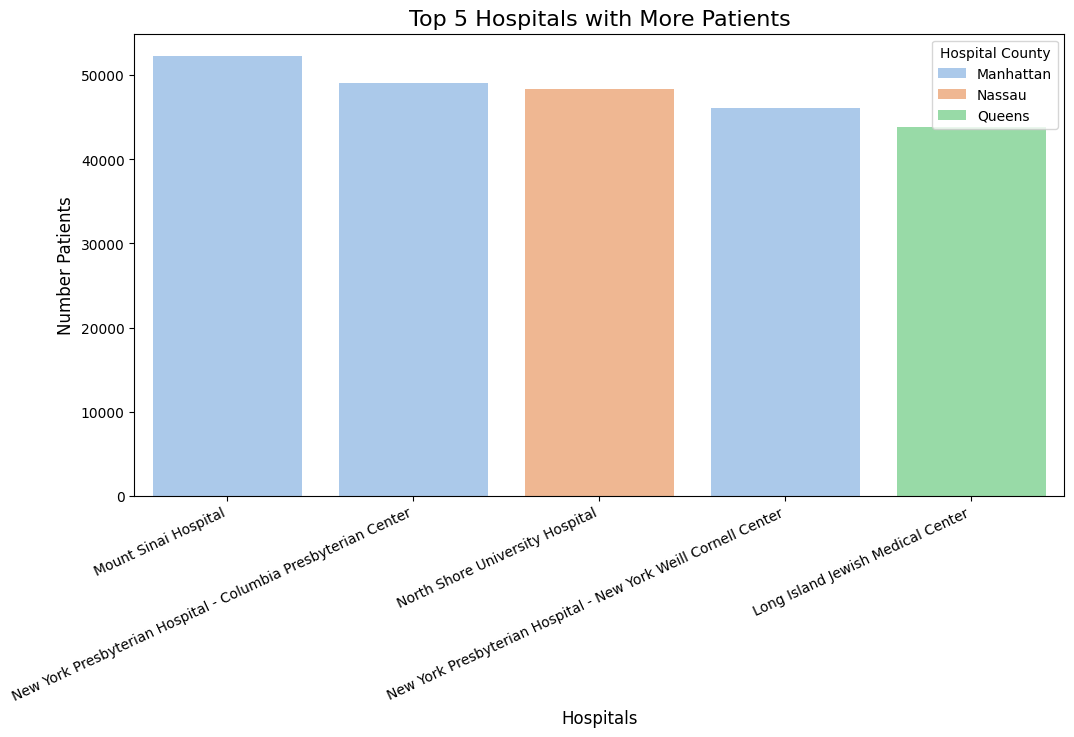

In [9]:
# Hospital distribution (hospital with most patients)County distribution (county with most hospitals)
fig2, ax2 = plt.subplots(figsize=(12,6))
top_hospitals = data["Facility Name"].value_counts().nlargest(5)
top_hospital_names = top_hospitals.index
top_hospital_counties = data[data["Facility Name"].isin(top_hospital_names)][["Facility Name", "Hospital County"]].drop_duplicates()
top_hospitals = top_hospitals.reset_index().merge(top_hospital_counties, left_on="Facility Name", right_on="Facility Name")
unique_counties = top_hospitals["Hospital County"].unique()
palette = sns.color_palette("pastel", len(unique_counties))
county_color_map = dict(zip(unique_counties, palette))
sns.barplot(x=top_hospitals["Facility Name"], y=top_hospitals["count"], ax=ax2,
            hue=top_hospitals["Hospital County"], palette=county_color_map)
ax2.legend(title="Hospital County", loc="upper right")
ax2.set_xlabel("Hospitals", fontsize=12)
ax2.set_xticks(range(len(ax2.get_xticklabels())))
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=25, ha="right")
ax2.set_ylabel("Number Patients", fontsize=12)
ax2.set_title("Top 5 Hospitals with More Patients", fontsize=16)
plt.show()

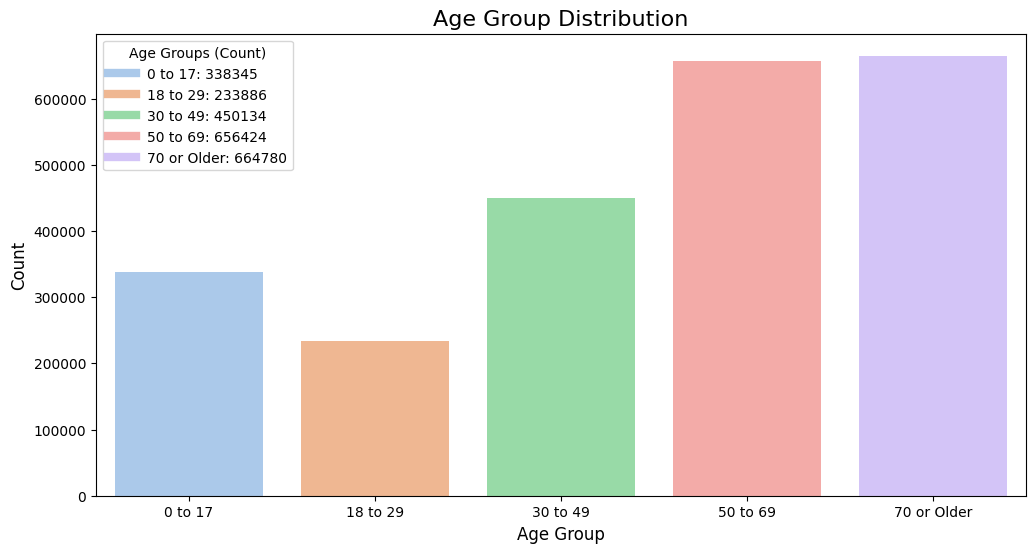

In [10]:
# Age distribution (most common age)
fig3, ax3 = plt.subplots(figsize=(12,6))
age_order = ["0 to 17", "18 to 29", "30 to 49", "50 to 69", "70 or Older"]
age_dist = data["Age Group"].value_counts()
age_dist = age_dist.reindex(age_order)
bars = sns.barplot(x=age_dist.index.astype(str), y=age_dist.values, ax=ax3, hue=age_dist.index.astype(str), palette="pastel", legend=False)
ax3.set_title("Age Group Distribution", fontsize=16)
ax3.set_xlabel("Age Group", fontsize=12)
ax3.set_ylabel("Count", fontsize=12)
handles = [plt.Line2D([0], [0], color=bars.patches[i].get_facecolor(), lw=6) for i in range(len(age_order))]
labels = [f"{group}: {age_dist[group]}" for group in age_order]
ax3.legend(handles, labels, title="Age Groups (Count)", loc="upper left", fontsize=10)
plt.show()

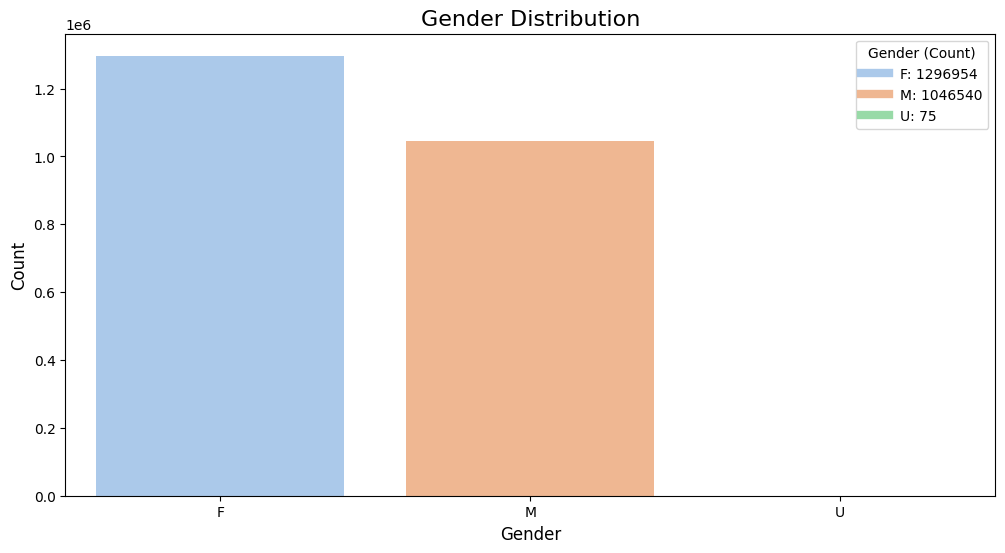

In [11]:
# Gender distribution (most common gender)
fig4, ax4 = plt.subplots(figsize=(12,6))
gender_dist = data["Gender"].value_counts()
sns.barplot(x=gender_dist.index.astype(str), y=gender_dist.values, ax=ax4, hue=gender_dist.index.astype(str), palette="pastel", legend=False)
ax4.set_title("Gender Distribution", fontsize=16)
ax4.set_xlabel("Gender", fontsize=12)
ax4.set_ylabel("Count", fontsize=12)
handles = [plt.Line2D([0], [0], color=bar.get_facecolor(), lw=6) for bar in bars.patches[:len(gender_dist)]]
labels = [f"{gender}: {count}" for gender, count in zip(gender_dist.index, gender_dist.values)]
ax4.legend(handles, labels, title="Gender (Count)", loc="upper right", fontsize=10)
plt.show()

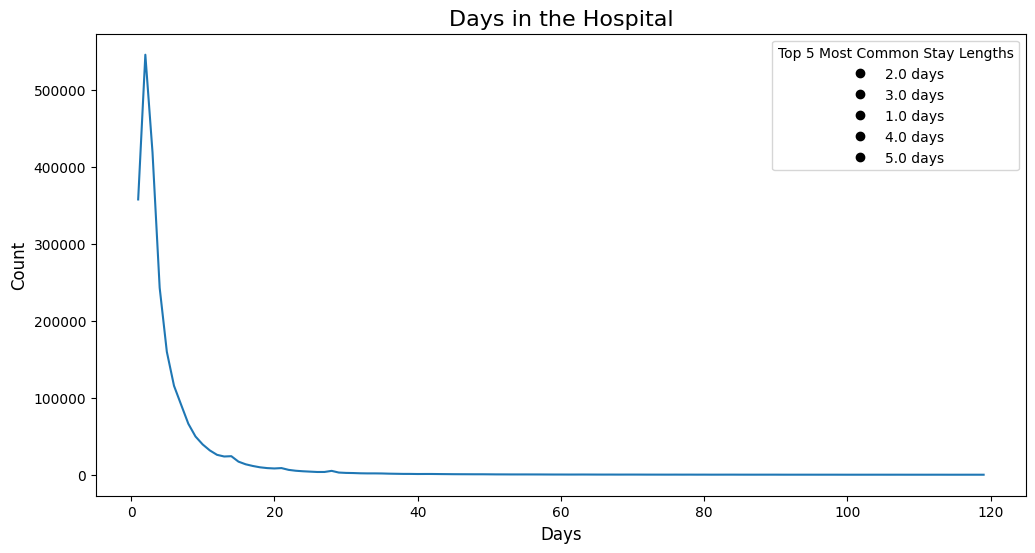

In [12]:
fig5, ax5 = plt.subplots(figsize=(12,6))
data["Length of Stay"] = pd.to_numeric(data["Length of Stay"], errors="coerce")
length_of_stay_counts = data["Length of Stay"].value_counts().sort_index()
top_5_days = length_of_stay_counts.nlargest(5).index.tolist()
sns.lineplot(x=length_of_stay_counts.index, y=length_of_stay_counts.values, ax=ax5)
ax5.set_title("Days in the Hospital", fontsize=16)
ax5.set_xlabel("Days", fontsize=12)
ax5.set_ylabel("Count", fontsize=12)
legend_labels = [f"{day} days" for day in top_5_days]
legend_handles = [plt.Line2D([0], [0], marker='o', color='black', linestyle='None') for _ in top_5_days]
ax5.legend(legend_handles, legend_labels, title="Top 5 Most Common Stay Lengths", loc="upper right", fontsize=10)
plt.show()

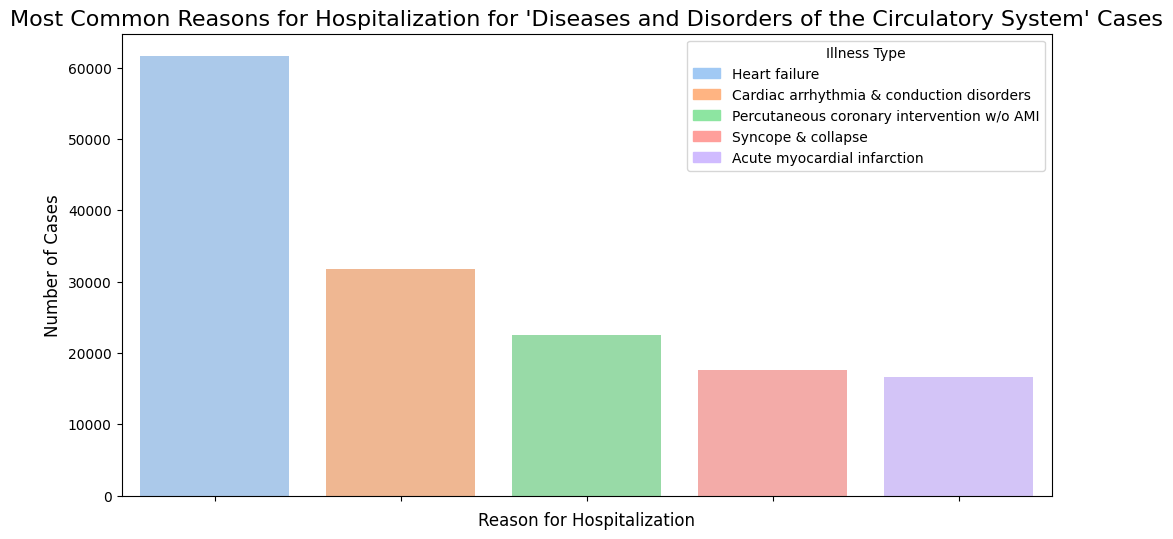

In [13]:
# APR DRG Description (from the most common broad category, 5 most common reasons to go to the hospital)
fig6, ax6 = plt.subplots(figsize=(12,6))
top_broad_reason = data["APR MDC Description"].value_counts().idxmax()
filtered_df = data[data["APR MDC Description"] == top_broad_reason]
top_reasons = filtered_df["APR DRG Description"].value_counts().nlargest(5)
unique_reasons = top_reasons.index
palette = sns.color_palette("pastel", len(unique_reasons))
reason_color_map = dict(zip(unique_reasons, palette))
sns.barplot(x=top_reasons.index, y=top_reasons.values, hue=top_reasons.index,
            palette=[reason_color_map[reason] for reason in top_reasons.index], ax=ax6)
ax6.set_title(f"Most Common Reasons for Hospitalization for '{top_broad_reason}' Cases", fontsize=16)
ax6.set_xlabel("Reason for Hospitalization", fontsize=12)
ax6.set_xticklabels([])
ax6.set_ylabel("Number of Cases", fontsize=12)
ax6.set_xticks(range(len(unique_reasons)))  # Set tick positions
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=25, ha="right")
handles = [plt.Rectangle((0,0),1,1, color=reason_color_map[reason]) for reason in unique_reasons]
ax6.legend(handles, unique_reasons, title="Illness Type", loc="upper right")
plt.show()